In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [40]:
df = pd.read_csv('heart.csv')

In [41]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [42]:
df.isnull().values.any()


False

In [43]:
df = df.replace("M", 1)
df = df.replace("F", 2)

from sklearn import preprocessing

number = preprocessing.LabelEncoder()

df["ChestPainType"] = number.fit_transform(df["ChestPainType"])
df["RestingECG"] = number.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = number.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = number.fit_transform(df["ST_Slope"])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,2,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,2,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [44]:
X = df.drop(["HeartDisease"], axis = 1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.1)

In [45]:
model = LogisticRegression(solver = "saga", max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [46]:
model.score(X_test, y_test)

0.8804347826086957

In [47]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
model.score(X_test, y_test)

0.8913043478260869

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [51]:
model.score(X_test, y_test)

0.8260869565217391

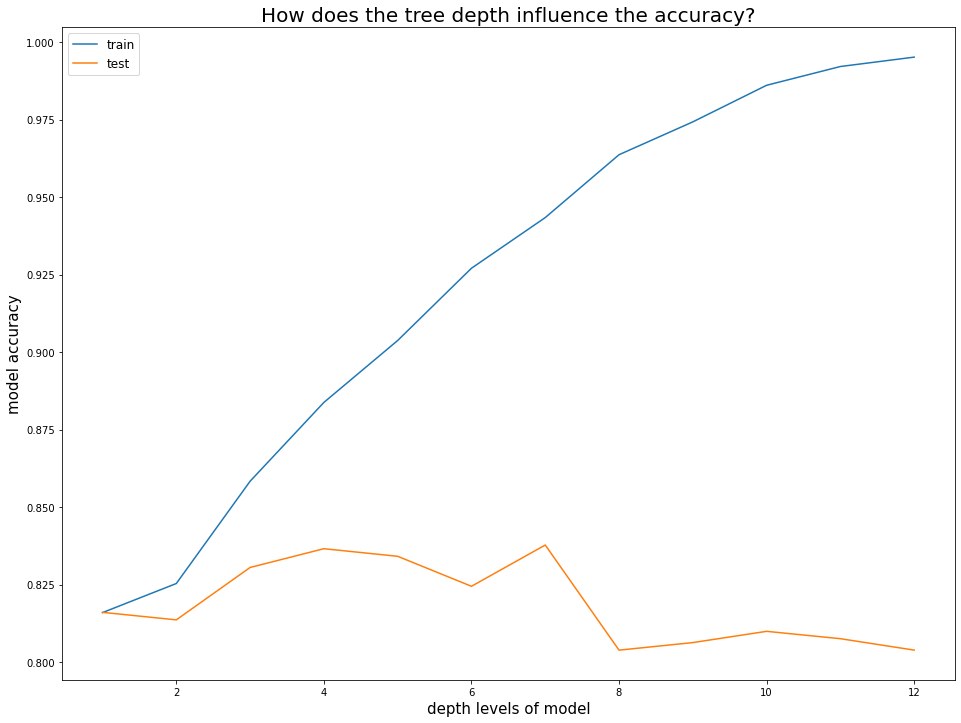

In [53]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np

param_range = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name = "max_depth", param_range = param_range)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 12))

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

plt.title("How does the tree depth influence the accuracy?", fontsize = 20)
plt.xlabel("depth levels of model", fontsize = 15)
plt.ylabel("model accuracy", fontsize = 15)

plt.legend(["train", "test"], loc = "upper left", fontsize = 12)

plt.show()